In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import squarify
pio.templates.default='plotly_white'
from datetime import datetime

In [2]:
df=pd.read_csv('rfm_data.csv')

In [3]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [4]:
df['PurchaseDate']=pd.to_datetime(df["PurchaseDate"])

In [5]:
df.head()


,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [6]:
df['Recency']=(datetime.now().date()-df['PurchaseDate'].dt.date).dt.days

In [7]:
freq_data=df.groupby("CustomerID")['OrderID'].count().reset_index()
freq_data.rename(columns={'OrderID':"Frequency"},inplace=True)
df=df.merge(freq_data,on='CustomerID',how='left')

In [8]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,306,1
1,2188,2023-04-11,463.70,Product A,176819,London,306,1
2,4608,2023-04-11,80.28,Product A,340062,New York,306,1
3,2559,2023-04-11,221.29,Product A,239145,London,306,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,306,1


In [9]:
monetary_data=df.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_data.rename(columns={'TransactionAmount':'MonetaryValue'},inplace=True)
df=df.merge(monetary_data,on='CustomerID',how='left')

In [10]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,306,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,306,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,306,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,306,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,306,1,739.56


In [11]:
##Scoring criteria for each RFM value
recency_scores=[5,4,3,2,1]
frequency_scores=[1,2,3,4,5]
monetary_scores=[1,2,3,4,5]

In [12]:
##Calculating RFM score
df['RecencyScore']=pd.cut(df['Recency'],bins=5,labels=recency_scores)
df['FreqScore']=pd.cut(df['Frequency'],bins=5,labels=frequency_scores)
df['MonetaryScore']=pd.cut(df['MonetaryValue'],bins=5,labels=monetary_scores)

In [13]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FreqScore,MonetaryScore
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,306,1,943.31,1,1,2
1,2188,2023-04-11,463.70,Product A,176819,London,306,1,463.70,1,1,1
2,4608,2023-04-11,80.28,Product A,340062,New York,306,1,80.28,1,1,1
3,2559,2023-04-11,221.29,Product A,239145,London,306,1,221.29,1,1,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,306,1,739.56,1,1,2


In [14]:
df['RecencyScore']=df['RecencyScore'].astype(int)
df['FreqScore']=df['FreqScore'].astype(int)
df['MonetaryScore']=df['MonetaryScore'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
 6   Recency             1000 non-null   int64         
 7   Frequency           1000 non-null   int64         
 8   MonetaryValue       1000 non-null   float64       
 9   RecencyScore        1000 non-null   int32         
 10  FreqScore           1000 non-null   int32         
 11  MonetaryScore       1000 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(4), object(2)
memory usage: 89.8+ KB


In [16]:
df['RFM_Score']=df['RecencyScore']+df['FreqScore']+df['MonetaryScore']
##RFM segments based on RFM score
segment_values=['Low Value','Mid Value','High Value']
df['Value Segment']=pd.qcut(df['RFM_Score'],q=3,labels=segment_values)

In [53]:
df['RFM_Score']

0      4
1      3
2      3
3      3
4      4
      ..
995    8
996    8
997    8
998    8
999    8
Name: RFM_Score, Length: 1000, dtype: int32

In [54]:
##Segment Distribution
segments_counts=df['Value Segment'].value_counts().reset_index()
segments_counts.columns=['Value Segment','Count']
segments_counts

,Value Segment,Count
0,Low Value,435
1,Mid Value,386
2,High Value,179


Text(0.5, 1.0, 'RMF value distribution')

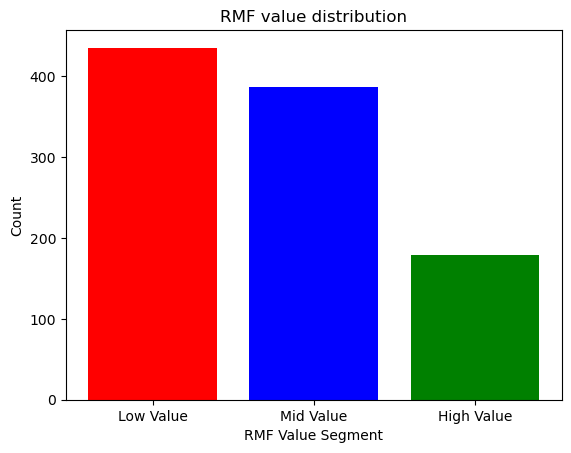

In [55]:
plt.bar(segments_counts['Value Segment'],segments_counts['Count'],color=['red', 'blue', 'green'])
plt.xlabel('RMF Value Segment')
plt.ylabel('Count')
plt.title('RMF value distribution')

**RFM Customer Segments**

In [67]:
df['RFM Customer Segments']=''

##RFM segment based on RMF score
df.loc[df['RFM_Score']>=9,'RFM Customer Segments']='Champions'
df.loc[(df['RFM_Score']>=6) & (df['RFM_Score']<9),'RFM Customer Segments']='Potential Loyalist'
df.loc[(df['RFM_Score']>=5) & (df['RFM_Score']<6),'RFM Customer Segments']='At risk Customers'
df.loc[(df['RFM_Score']>=4) & (df['RFM_Score']<5),'RFM Customer Segments']="Can't Lose"
df.loc[(df['RFM_Score']>=3) & (df['RFM_Score']<4),'RFM Customer Segments']='Lost'


In [68]:
df[['CustomerID','RFM Customer Segments']].values

array([[8814, "Can't Lose"],
       [2188, 'Lost'],
       [4608, 'Lost'],
       ...,
       [8836, 'Potential Loyalist'],
       [1440, 'Potential Loyalist'],
       [4759, 'Potential Loyalist']], dtype=object)

**RMF Analysis**

In [69]:
segment_product_count=df.groupby(['Value Segment','RFM Customer Segments']).size().reset_index(name="Count")
segment_product_count=segment_product_count.sort_values('Count',ascending=False)
segment_product_count

,Value Segment,RFM Customer Segments,Count
9,Mid Value,Potential Loyalist,386
0,Low Value,At risk Customers,180
1,Low Value,Can't Lose,173
14,High Value,Potential Loyalist,117
3,Low Value,Lost,82
12,High Value,Champions,62
2,Low Value,Champions,0
4,Low Value,Potential Loyalist,0
5,Mid Value,At risk Customers,0
6,Mid Value,Can't Lose,0


In [71]:
fig_treemap_segment_product=px.treemap(segment_product_count,path=['Value Segment','RFM Customer Segments'],
                                      values='Count',color='Value Segment',color_discrete_sequence=px.colors.qualitative.Pastel,
                                      title='RFM Customer Segments by Value')
fig_treemap_segment_product.show()


**Distribution of RFM values within Champion segment**

In [72]:
df.head(3)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FreqScore,MonetaryScore,RFM_Score,Value Segment,RFM Customer Segments
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,306,1,943.31,1,1,2,4,Low Value,Can't Lose
1,2188,2023-04-11,463.70,Product A,176819,London,306,1,463.70,1,1,1,3,Low Value,Lost
2,4608,2023-04-11,80.28,Product A,340062,New York,306,1,80.28,1,1,1,3,Low Value,Lost


In [79]:
champion_segment=df[df['RFM Customer Segments']=='Champions']


fig=go.Figure()
fig.add_trace(go.Box(y=champion_segment['RecencyScore'],name='Recency'))
fig.add_trace(go.Box(y=champion_segment['FreqScore'],name='Frequency'))
fig.add_trace(go.Box(y=champion_segment['MonetaryScore'],name='Monetary'))

fig.update_layout(title='Dist of RFM values within Champion segment',yaxis_title='RFM values',showlegend=True)


In [86]:
correlation_matrix=champion_segment[['RecencyScore','FreqScore','MonetaryScore']].corr()


fig_heatmap=go.Figure(data=go.Heatmap(
                        z=correlation_matrix.values,
                        y=correlation_matrix.columns,
                        x=correlation_matrix.columns,
                        colorscale='RdBu',
                        colorbar=dict(title='Correlation')))
fig_heatmap.update_layout(title='Correlation matrix of RFM values within Champions segment')
fig_heatmap.show()

In [106]:
import plotly.colors

pastel_colors=plotly.colors.qualitative.Pastel
segment_counts=df['RFM Customer Segments'].value_counts()

fig=go.Figure(data=[go.Bar(x=segment_counts.index,y=segment_counts.values,marker=dict(color=pastel_colors))])

champions_color='rgb(158,202,225)'

fig.update_traces(marker_color=[champions_color if segments=="Champions" else pastel_colors[i]
                               for i,segments in enumerate(segment_counts.index)],
                                 marker_line_color='rgb(8,48,107)',
                                 marker_line_width=1.5,opacity=0.6)

fig.update_layout(title='Comparison of RFM segments',
                 xaxis_title='RFM segments',
                 yaxis_title='No. of Customers',showlegend=False)

**recency, frequency, and monetary scores of all the segments**

In [107]:
df.head(3)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FreqScore,MonetaryScore,RFM_Score,Value Segment,RFM Customer Segments
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,306,1,943.31,1,1,2,4,Low Value,Can't Lose
1,2188,2023-04-11,463.70,Product A,176819,London,306,1,463.70,1,1,1,3,Low Value,Lost
2,4608,2023-04-11,80.28,Product A,340062,New York,306,1,80.28,1,1,1,3,Low Value,Lost


In [110]:
segment_scores=df.groupby('RFM Customer Segments')['RecencyScore','FreqScore','MonetaryScore'].mean().reset_index()
segment_scores

C:\Users\91789\AppData\Local\Temp\ipykernel_13996\3582682977.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,RFM Customer Segments,RecencyScore,FreqScore,MonetaryScore
0,At risk Customers,2.344444,1.011111,1.644444
1,Can't Lose,1.537572,1.000000,1.462428
2,Champions,3.806452,3.064516,3.225806
3,Lost,1.000000,1.000000,1.000000
4,Potential Loyalist,3.918489,1.194831,1.741551


In [123]:
fig=go.Figure()

fig.add_trace(go.Bar(x=segment_scores['RFM Customer Segments'],y=segment_scores['RecencyScore'],
                    name='Recency Score',marker_color='rgb(158,202,225)'))

fig.add_trace(go.Bar(x=segment_scores['RFM Customer Segments'],y=segment_scores['FreqScore'],
                    name='Freq Score',marker_color='rgb(95,154,217)'))

fig.add_trace(go.Bar(x=segment_scores['RFM Customer Segments'],y=segment_scores['MonetaryScore'],
                    name='Monetary Score',marker_color='rgb(32,102,217)'))

fig.update_layout(title='Comparison of RFM segments based on Recency,Frequency,Monetary value',
                 xaxis_title="RFM Segments",
                 yaxis_title='score',
                 barmode='group',showlegend=True)